In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Darpan\Desktop\Subjects\Data Science\Final Dataset\Final_ML_Dataset.csv',encoding='cp1252', error_bad_lines=False)
df[:15]

,Num_of_Citations,Publication_Name,Publication_Type,FOS,Specific_FOS,Age,Paragraph_Top_Topic,Title_Top_Topic,Paragraph_Num_Of_NLP_Topics,Title_Num_Of_NLP_Topics,Auth_Keywords_Num_Of_NLPTopics,First_Author_ID,First_Author_Affiliation_ID,Last_Author_ID,No_Of_Authors,Last_Author_Affiliation_ID,First_Auth_Aff_Country,Last_Auth_Aff_Country,Paragraph_Top_Topic_prob,Title_Top_Topic_prob
0,2,3411,3,2,31,11,10,14,5,2,1,15020330800,60092867,15765222400,2,60013682,111,103,0.567273,0.651918
1,17,3691,3,2,131,11,36,18,6,1,2,12784607800,60026195,8433926800,6,60026195,128,119,0.731176,0.739983
2,0,840,2,2,131,11,6,3,4,3,0,23093708100,60005472,6506393472,11,60005472,129,120,0.549364,0.426461
3,0,840,2,12,113,11,6,36,4,1,0,14631863500,60003488,55418118500,3,60003488,129,120,0.607424,0.730486
4,0,840,2,12,113,11,6,3,6,2,0,23095356100,60027090,6603405867,11,60027090,129,120,0.501338,0.425626
5,3,3740,3,12,113,11,41,19,1,1,2,25937841500,60008088,35378042400,3,60006028,15,13,0.865207,0.720393
6,7,3740,3,2,131,11,43,22,2,1,1,8833625100,60015760,7003541012,4,60015760,15,13,0.666656,0.777271
7,3,3740,3,2,131,11,11,0,4,2,2,8565487100,60021606,35216232900,11,60021606,15,13,0.575352,0.543160
8,0,840,2,2,131,11,3,11,5,3,0,6507701652,60009254,6507701652,1,60009254,129,120,0.404676,0.364608
9,6,6031,1,12,113,11,3,43,3,1,2,23093805800,60023932,15126782000,3,60023932,4,3,0.522804,0.745086


In [2]:
#Check Number of rows and columns
df.shape

(75456, 20)

In [3]:
df['Num_of_Citations'].replace(0, 0.0001,inplace=True)
df[:15]

,Num_of_Citations,Publication_Name,Publication_Type,FOS,Specific_FOS,Age,Paragraph_Top_Topic,Title_Top_Topic,Paragraph_Num_Of_NLP_Topics,Title_Num_Of_NLP_Topics,Auth_Keywords_Num_Of_NLPTopics,First_Author_ID,First_Author_Affiliation_ID,Last_Author_ID,No_Of_Authors,Last_Author_Affiliation_ID,First_Auth_Aff_Country,Last_Auth_Aff_Country,Paragraph_Top_Topic_prob,Title_Top_Topic_prob
0,2.0000,3411,3,2,31,11,10,14,5,2,1,15020330800,60092867,15765222400,2,60013682,111,103,0.567273,0.651918
1,17.0000,3691,3,2,131,11,36,18,6,1,2,12784607800,60026195,8433926800,6,60026195,128,119,0.731176,0.739983
2,0.0001,840,2,2,131,11,6,3,4,3,0,23093708100,60005472,6506393472,11,60005472,129,120,0.549364,0.426461
3,0.0001,840,2,12,113,11,6,36,4,1,0,14631863500,60003488,55418118500,3,60003488,129,120,0.607424,0.730486
4,0.0001,840,2,12,113,11,6,3,6,2,0,23095356100,60027090,6603405867,11,60027090,129,120,0.501338,0.425626
5,3.0000,3740,3,12,113,11,41,19,1,1,2,25937841500,60008088,35378042400,3,60006028,15,13,0.865207,0.720393
6,7.0000,3740,3,2,131,11,43,22,2,1,1,8833625100,60015760,7003541012,4,60015760,15,13,0.666656,0.777271
7,3.0000,3740,3,2,131,11,11,0,4,2,2,8565487100,60021606,35216232900,11,60021606,15,13,0.575352,0.543160
8,0.0001,840,2,2,131,11,3,11,5,3,0,6507701652,60009254,6507701652,1,60009254,129,120,0.404676,0.364608
9,6.0000,6031,1,12,113,11,3,43,3,1,2,23093805800,60023932,15126782000,3,60023932,4,3,0.522804,0.745086


In [ ]:
# Using Pandas qcut method to divide up the classes

#Perform qcut to evenly create 4 bins and enter the corresponding class in CITE_CLASS
df["CITE_CLASS"] = pd.qcut(df.Num_of_Citations.rank(method='first'), 4, labels=[1,2,3,4])
df["CITE_CLASS"].value_counts()

In [ ]:
#Trying a Box Cox Transformation and then Z Score to divide up the classes
from scipy import stats
df['Temp'] = stats.boxcox(df.Num_of_Citations)[0]

# Doing a Z score on Num_of_Citations
from scipy.stats import zscore
df['CITE_CLASS'] = zscore(df['Temp'])

# Divide CITE_CLASS into 4 classes (<-1 = class1; -1 to 0 = class2; 0 to 1 = class3; >1 = class4)
def func(row):
    if row['CITE_CLASS'] < -1:
        val = 1
    elif row['CITE_CLASS'] < 0:
        val = 2
    elif row['CITE_CLASS'] < 1:
        val = 3
    else:
        val = 4
    return val

df['CITE_CLASS'] = df.apply(func, axis=1)
df["CITE_CLASS"].value_counts()

In [4]:
#Trying a Log Transformation and then Z Score to divide up the classes
import numpy as np
transform = np.asarray(df[['Num_of_Citations']].values)
df["Temp"] = np.log(transform)
df[:15]

,Num_of_Citations,Publication_Name,Publication_Type,FOS,Specific_FOS,Age,Paragraph_Top_Topic,Title_Top_Topic,Paragraph_Num_Of_NLP_Topics,Title_Num_Of_NLP_Topics,...,First_Author_ID,First_Author_Affiliation_ID,Last_Author_ID,No_Of_Authors,Last_Author_Affiliation_ID,First_Auth_Aff_Country,Last_Auth_Aff_Country,Paragraph_Top_Topic_prob,Title_Top_Topic_prob,Temp
0,2.0000,3411,3,2,31,11,10,14,5,2,...,15020330800,60092867,15765222400,2,60013682,111,103,0.567273,0.651918,0.693147
1,17.0000,3691,3,2,131,11,36,18,6,1,...,12784607800,60026195,8433926800,6,60026195,128,119,0.731176,0.739983,2.833213
2,0.0001,840,2,2,131,11,6,3,4,3,...,23093708100,60005472,6506393472,11,60005472,129,120,0.549364,0.426461,-9.210340
3,0.0001,840,2,12,113,11,6,36,4,1,...,14631863500,60003488,55418118500,3,60003488,129,120,0.607424,0.730486,-9.210340
4,0.0001,840,2,12,113,11,6,3,6,2,...,23095356100,60027090,6603405867,11,60027090,129,120,0.501338,0.425626,-9.210340
5,3.0000,3740,3,12,113,11,41,19,1,1,...,25937841500,60008088,35378042400,3,60006028,15,13,0.865207,0.720393,1.098612
6,7.0000,3740,3,2,131,11,43,22,2,1,...,8833625100,60015760,7003541012,4,60015760,15,13,0.666656,0.777271,1.945910
7,3.0000,3740,3,2,131,11,11,0,4,2,...,8565487100,60021606,35216232900,11,60021606,15,13,0.575352,0.543160,1.098612
8,0.0001,840,2,2,131,11,3,11,5,3,...,6507701652,60009254,6507701652,1,60009254,129,120,0.404676,0.364608,-9.210340
9,6.0000,6031,1,12,113,11,3,43,3,1,...,23093805800,60023932,15126782000,3,60023932,4,3,0.522804,0.745086,1.791759


In [5]:
# Doing a Z score on Num_of_Citations
from scipy.stats import zscore
df['CITE_CLASS'] = zscore(df['Temp'])
df[:15]

,Num_of_Citations,Publication_Name,Publication_Type,FOS,Specific_FOS,Age,Paragraph_Top_Topic,Title_Top_Topic,Paragraph_Num_Of_NLP_Topics,Title_Num_Of_NLP_Topics,...,First_Author_Affiliation_ID,Last_Author_ID,No_Of_Authors,Last_Author_Affiliation_ID,First_Auth_Aff_Country,Last_Auth_Aff_Country,Paragraph_Top_Topic_prob,Title_Top_Topic_prob,Temp,CITE_CLASS
0,2.0000,3411,3,2,31,11,10,14,5,2,...,60092867,15765222400,2,60013682,111,103,0.567273,0.651918,0.693147,0.454863
1,17.0000,3691,3,2,131,11,36,18,6,1,...,60026195,8433926800,6,60026195,128,119,0.731176,0.739983,2.833213,0.849024
2,0.0001,840,2,2,131,11,6,3,4,3,...,60005472,6506393472,11,60005472,129,120,0.549364,0.426461,-9.210340,-1.369182
3,0.0001,840,2,12,113,11,6,36,4,1,...,60003488,55418118500,3,60003488,129,120,0.607424,0.730486,-9.210340,-1.369182
4,0.0001,840,2,12,113,11,6,3,6,2,...,60027090,6603405867,11,60027090,129,120,0.501338,0.425626,-9.210340,-1.369182
5,3.0000,3740,3,12,113,11,41,19,1,1,...,60008088,35378042400,3,60006028,15,13,0.865207,0.720393,1.098612,0.529542
6,7.0000,3740,3,2,131,11,43,22,2,1,...,60015760,7003541012,4,60015760,15,13,0.666656,0.777271,1.945910,0.685599
7,3.0000,3740,3,2,131,11,11,0,4,2,...,60021606,35216232900,11,60021606,15,13,0.575352,0.543160,1.098612,0.529542
8,0.0001,840,2,2,131,11,3,11,5,3,...,60009254,6507701652,1,60009254,129,120,0.404676,0.364608,-9.210340,-1.369182
9,6.0000,6031,1,12,113,11,3,43,3,1,...,60023932,15126782000,3,60023932,4,3,0.522804,0.745086,1.791759,0.657207


In [6]:
# Divide CITE_CLASS into 4 classes (<-1 = class1; -1 to 0 = class2; 0 to 1 = class3; >1 = class4)
def func(row):
    if row['CITE_CLASS'] < -1:
        val = 1
    elif row['CITE_CLASS'] < 0:
        val = 2
    elif row['CITE_CLASS'] < 1:
        val = 2
    else:
        val = 3
    return val

df['CITE_CLASS'] = df.apply(func, axis=1)
print(df["CITE_CLASS"].value_counts())
print(df[:15])

3    43324
1    25439
4     6693
Name: CITE_CLASS, dtype: int64
    Num_of_Citations  Publication_Name  Publication_Type  FOS  Specific_FOS  \
0             2.0000              3411                 3    2            31   
1            17.0000              3691                 3    2           131   
2             0.0001               840                 2    2           131   
3             0.0001               840                 2   12           113   
4             0.0001               840                 2   12           113   
5             3.0000              3740                 3   12           113   
6             7.0000              3740                 3    2           131   
7             3.0000              3740                 3    2           131   
8             0.0001               840                 2    2           131   
9             6.0000              6031                 1   12           113   
10            0.0001              3740                 3    2      

In [7]:
#Random Forest

# Required Python Packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

HEADERS = ['CITE_CLASS','Publication_Name','Publication_Type','FOS','Specific_FOS','Age','Paragraph_Top_Topic','Title_Top_Topic','Paragraph_Num_Of_NLP_Topics','Title_Num_Of_NLP_Topics','Auth_Keywords_Num_Of_NLPTopics','First_Author_ID','First_Author_Affiliation_ID','Last_Author_ID','No_Of_Authors','Last_Author_Affiliation_ID','First_Auth_Aff_Country','Last_Auth_Aff_Country','Paragraph_Top_Topic_prob','Title_Top_Topic_prob']

def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """

    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],train_size=train_percentage)
    return train_x, test_x, train_y, test_y

def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(features, target)
    return clf

def main():
    """
    Main function
    :return:
    """
    # Load the csv file into pandas dataframe
    dataset = df


    train_x, test_x, train_y, test_y = split_dataset(dataset, 0.7, HEADERS[1:17], HEADERS[0])

    # Train and Test dataset size details
    print ("Train_x Shape :: ", train_x.shape)
    print ("Train_y Shape :: ", train_y.shape)
    print ("Test_x Shape :: ", test_x.shape)
    print ("Test_y Shape :: ", test_y.shape)

    
    # Create random forest classifier instance
    trained_model = random_forest_classifier(train_x, train_y)
    print ("\nTrained model :: \n", trained_model)
    predictions = trained_model.predict(test_x)

    # Train and Test Accuracy
    print ("\nTrain Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
    print ("Test Accuracy  :: ", accuracy_score(test_y, predictions))
    print ("\n Confusion matrix \n", confusion_matrix(test_y, predictions))
    
    # Printing Feature Importance
    print ("\nFeature Importance :: \n", pd.DataFrame(trained_model.feature_importances_, index = train_x.columns, columns=['importance']).sort_values('importance',ascending=False))
    
    #Printing Classification Report
    print("\nClassification Report :: \n", classification_report(test_y, predictions))
    
if __name__ == "__main__":
    main()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train_x Shape ::  (52819, 16)
Train_y Shape ::  (52819,)
Test_x Shape ::  (22637, 16)
Test_y Shape ::  (22637,)

Trained model :: 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Train Accuracy ::  1.0
Test Accuracy  ::  0.7387463003048107

 Confusion matrix 
 [[ 5487  2096     5]
 [ 1907 11000   139]
 [   18  1749   236]]

Feature Importance :: 
                                 importance
Publication_Name                  0.140645
Publication_Type                  0.104756
Age                               0.103837
First_Author_ID                   0.080932
Last_Author_ID                    0.078193
Last_Author_Affi

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train_x Shape ::  (52819, 16)
Train_y Shape ::  (52819,)
Test_x Shape ::  (22637, 16)
Test_y Shape ::  (22637,)
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Train Accuracy ::  0.7509418959086692
Test Accuracy  ::  0.7408667226222556

 Confusion matrix 
 [[ 5369  2227     1]
 [ 1780 11118   157]
 [   20  1681   284]]

Feature Importance :: 
                                 importance
Publication_Name                  0.255362
Age                               0.130673
Last_Author_ID                    0.079801
Publication_Type                  0.079302
No_Of_Authors                     0.066334
First_Auth_Aff_Country            0.064339
First_Author_ID                   0.062344
Last_Author_Affiliation_ID        0.039401
Paragraph_Top_Topic               0.038404
Paragraph_Num_Of_NLP_Topics       0.036409
First_Author_Affiliation_ID       0.036409
Auth_Keywords_Num_Of_NLPTopics    0.032419
Title_Top_Topic                   0.026933
Specific_FOS                      0.020948
FOS                               0.015461
Title_Num_Of_NLP_Topics           0.015461

Classification Report :: 
              precision    recall  f1-score   support



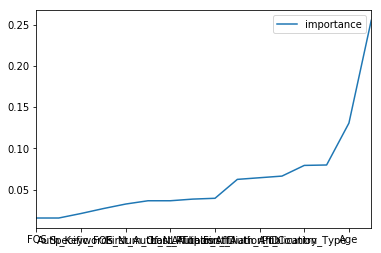

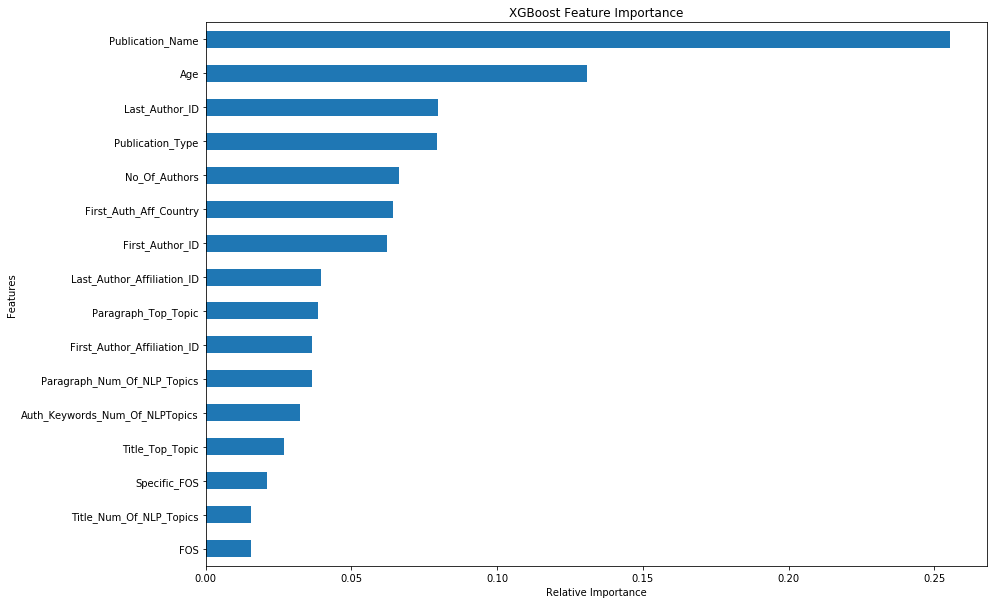

In [8]:
#Extreme Gradient Boosting

# Required Python Packages
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pylab as plt
from matplotlib import pyplot

HEADERS = ['CITE_CLASS','Publication_Name','Publication_Type','FOS','Specific_FOS','Age','Paragraph_Top_Topic','Title_Top_Topic','Paragraph_Num_Of_NLP_Topics','Title_Num_Of_NLP_Topics','Auth_Keywords_Num_Of_NLPTopics','First_Author_ID','First_Author_Affiliation_ID','Last_Author_ID','No_Of_Authors','Last_Author_Affiliation_ID','First_Auth_Aff_Country','Last_Auth_Aff_Country','Paragraph_Top_Topic_prob','Title_Top_Topic_prob']

def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """

    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],train_size=train_percentage)
    return train_x, test_x, train_y, test_y

def main():
    """
    Main function
    :return:
    """
    # Load the csv file into pandas dataframe
    dataset = df


    train_x, test_x, train_y, test_y = split_dataset(dataset, 0.7, HEADERS[1:17], HEADERS[0])

    # Train and Test dataset size details
    print ("Train_x Shape :: ", train_x.shape)
    print ("Train_y Shape :: ", train_y.shape)
    print ("Test_x Shape :: ", test_x.shape)
    print ("Test_y Shape :: ", test_y.shape)

    # fit model no training data
    trained_model = XGBClassifier(n_estimators=100, learning_rate=0.3)
    trained_model.fit(train_x, train_y)
    print(trained_model)
    predictions = trained_model.predict(test_x)

    # Train and Test Accuracy
    print ("\nTrain Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
    print ("Test Accuracy  :: ", accuracy_score(test_y, predictions))
    print ("\n Confusion matrix \n", confusion_matrix(test_y, predictions))
    
    # Printing Feature Importance
    print ("\nFeature Importance :: \n", pd.DataFrame(trained_model.feature_importances_, index = train_x.columns, columns=['importance']).sort_values('importance',ascending=False))
    
    #Printing Classification Report
    print("\nClassification Report :: \n", classification_report(test_y, predictions))
    
    
    dataset = pd.DataFrame(trained_model.feature_importances_, index = train_x.columns, columns=['importance']).sort_values('importance',ascending=True)
    dataset["features"] = dataset.index
    plt.figure()
    dataset.plot()
    dataset.plot(kind='barh', x="features", y='importance', legend=False, figsize=(14, 10))
    plt.title('XGBoost Feature Importance')
    plt.xlabel('Relative Importance')
    plt.ylabel('Features')
    pyplot.show()
    
if __name__ == "__main__":
    main()